In [2]:
import pandas as pd
#creating a data frame from a dictionary
data={
    "Name":["John","Jane","Jack"],
    "course":["Btech","Mtech","MBA"],
    "Marks":[80,90,95]
}
df=pd.DataFrame(data)
print(df)

   Name course  Marks
0  John  Btech     80
1  Jane  Mtech     90
2  Jack    MBA     95


In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(type(data))

<class 'dict'>


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   course  3 non-null      object
 2   Marks   3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
None


In [6]:
print(df.describe())

           Marks
count   3.000000
mean   88.333333
std     7.637626
min    80.000000
25%    85.000000
50%    90.000000
75%    92.500000
max    95.000000


Data Cleaning and Manipulation


In [7]:
#creating a data with missing values and duplicates
data={
    'ID':[1,2,2,3,4],
    'value':[10,15,15,None,20],
    'category':['A','B','B','A',None]
}
data

{'ID': [1, 2, 2, 3, 4],
 'value': [10, 15, 15, None, 20],
 'category': ['A', 'B', 'B', 'A', None]}

In [8]:
df1=pd.DataFrame(data)
df1

,ID,value,category
0,1,10.0,A
1,2,15.0,B
2,2,15.0,B
3,3,NaN,A
4,4,20.0,None


In [9]:
#Drop duplicate values
df1=df1.drop_duplicates()
df1

,ID,value,category
0,1,10.0,A
1,2,15.0,B
3,3,NaN,A
4,4,20.0,None


In [10]:
#Fill missing values
df1['value']=df1['value'].fillna(df1['value'].mean())
df1['category']=df1['category'].fillna('Unknown')
df1

/tmp/ipython-input-10-2273951688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['value']=df1['value'].fillna(df1['value'].mean())
/tmp/ipython-input-10-2273951688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['category']=df1['category'].fillna('Unknown')


,ID,value,category
0,1,10.0,A
1,2,15.0,B
3,3,15.0,A
4,4,20.0,Unknown


In [11]:
#Rename Columns
df1.rename(columns={'value':'Score'},inplace=True)
df1

/tmp/ipython-input-11-1581413638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'value':'Score'},inplace=True)


,ID,Score,category
0,1,10.0,A
1,2,15.0,B
3,3,15.0,A
4,4,20.0,Unknown


In [12]:
#sample DataFrames to merge
df1=pd.DataFrame({'key':['A','B','C'],'value':[1,2,3]})
df2=pd.DataFrame({'key':['B','C','D'],'value':[4,5,6]})

WEEK-5:Cleaning , Transforming and Enriching Data


In [13]:
##Step-1
#a)import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
#Step-2
#b)Data Overview
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [15]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#checking for missing values
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Step 3: Visualizing Distributions



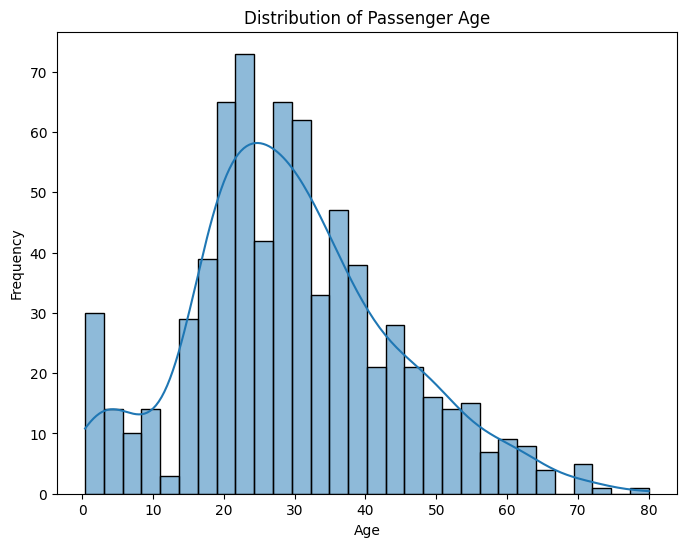

In [17]:
#Distribution of Age
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.histplot(titanic['age'],bins=30,kde=True)
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Step 4: Analyzing Categorical Variables


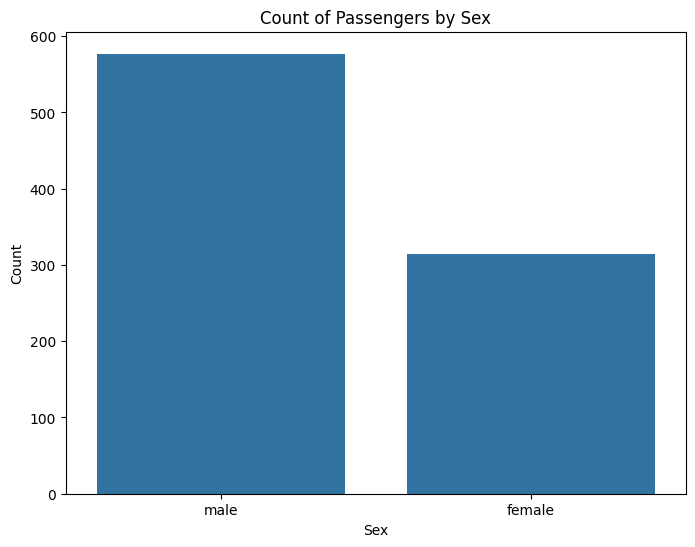

In [18]:
#count plot for sex
plt.figure(figsize=(8,6))
sns.countplot(data=titanic,x='sex')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Step 5: Relationship Analysis


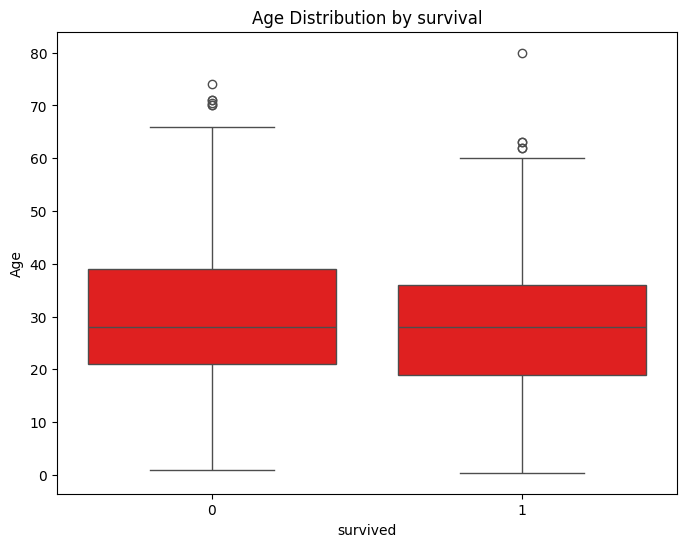

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=titanic,x='survived',y='age',color='red')
plt.title('Age Distribution by survival')
plt.xlabel('survived')
plt.ylabel('Age')
plt.show()

In [ ]:
#cr

5b)Handling common data issues using pandas

In [20]:
#Handling Missing Values:
import pandas as pd
import numpy as np
data={
    'Name':['Alice','Bob','Charlie',np.nan,'Eve'],
    'Age':[25,30,np.nan,22,28],
    'Salary':[50000,60000,np.nan,55000,65000]
}
df=pd.DataFrame(data)
df

,Name,Age,Salary
0,Alice,25.0,50000.0
1,Bob,30.0,60000.0
2,Charlie,NaN,NaN
3,NaN,22.0,55000.0
4,Eve,28.0,65000.0


In [21]:
import sqlite3
connection=sqlite3.connect('example.db')
cursor=connection.cursor()
cursor.execute('''
create table if not exists officers(
id integer primary key autoincrement,
name text not null,
age integer,
department text
)
''')
connection.commit()
cursor.execute('''
insert into officers(name,age,department)
VALUES(?,?,?)
''',('Elsa',20,'Data Science'))
officers_data=[
    ('chota Bheem',50,'Software Development'),
    ('Sofia',29,'Marketing'),
    ('Little Krishna',22,'Human Resources'),
    ('Doraemon',54,'AIML'),
    ('Shinchan',48,'Business Analysis')
    ]
cursor.executemany('''
insert into officers(name,age,department)
values(?,?,?)''',officers_data)
connection.commit()
print("\nAll Officers:")
cursor.execute("SELECT * FROM officers")
all_officers=cursor.fetchall()
for officer in all_officers:
    print(officer)
print("\nOfficers Older than 28:")
cursor.execute("SELECT * FROM officers WHERE age>?",(28,))
older_officers=cursor.fetchall()
for officer in older_officers:
    print(officer)
    #Extract one record
print("\n first employee in marketing:")
cursor.execute("SELECT * FROM officers WHERE department = ? LIMIT 1",('Marketing',))
marketing_officer=cursor.fetchone()
print(marketing_officer)
cursor.close()
connection.close()



All Officers:
(1, 'Elsa', 20, 'Data Science')
(2, 'chota Bheem', 50, 'Software Development')
(3, 'Sofia', 29, 'Marketing')
(4, 'Little Krishna', 22, 'Human Resources')
(5, 'Doraemon', 54, 'AIML')
(6, 'Shinchan', 48, 'Business Analysis')

Officers Older than 28:
(2, 'chota Bheem', 50, 'Software Development')
(3, 'Sofia', 29, 'Marketing')
(5, 'Doraemon', 54, 'AIML')
(6, 'Shinchan', 48, 'Business Analysis')

 first employee in marketing:
(3, 'Sofia', 29, 'Marketing')


In [22]:
pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 17.5 MB/s eta 0:00:00


In [23]:
from pymongo import MongoClient

In [24]:
client=MongoClient('mongodb://localhost:27017/')

In [25]:
db=client['exampleDB']

In [26]:
collection=db['users']

In [27]:
user_data={
    "name":"Suma",
    "age":18,
    "email":"sumareddy.satti@gmail.com"
}

In [33]:
insert_result=collection.insert_one(user_data)

ServerSelectionTimeoutError: localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms), Timeout: 30s, Topology Description: <TopologyDescription id: 685535881dfd72c694e97e1e, topology_type: Unknown, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 111] Connection refused (configured timeouts: socketTimeoutMS: 20000.0ms, connectTimeoutMS: 20000.0ms)')>]>

In [32]:
!pip install pymongo
from pymongo import MongoClient

# Ensure MongoDB is running!
# Open a terminal and run: sudo systemctl start mongod

# Connect to MongoDB
try:
    client = MongoClient('mongodb://localhost:27017/')
    # Try connecting to the default MongoDB URI
    print("Connection Successful!")

    # Access database and collection
    db = client['exampleDB']
    collection = db['users']

    # Insert user data
    user_data = {
        "name": "Suma",
        "age": 18,
        "email": "sumareddy.satti@gmail.com"
    }
    insert_result = collection.insert_one(user_data)
    print("Data Inserted!")
    print(insert_result.inserted_id)

except Exception as e:
    print(f"Error connecting to MongoDB: {e}")

Connection Successful!


KeyboardInterrupt: 

In [31]:
user_bulk=[
    {
        "name": "Suma",
        "email": "sumareddy.satti@gmail.com",
        "interest": ["music", "dance", "travel"]
    },
    {
        "name": "Suma",
        "email": "sumareddy.satti@gmail.com",
        "interest": ["music", "dance", "travel"]
    }
]

In [29]:
bulk_result=collection.insert_many(user_data)
print(f"{bulk_result.inserted_ids}")

TypeError: documents must be a non-empty list

In [30]:
print()